In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = str(os.getcwd()).replace("src", "")
sector_list = []
listfolder = os.listdir(f'{path}'+'/result')
for sector in listfolder:
    if ".csv" in sector:
        sector_list.append(sector)
    else:
        continue
print(sector_list)
df_all_wafers = pd.DataFrame()
for files in sector_list:
    df = pd.read_csv(f'{path}'+'/result'+f'/{files}',dtype={'Code':str}, parse_dates=['Date'])
#     df_all_wafers = pd.concat([df_all_wafers, df])
# df_all_wafers
df

['HY202103_D07_(0,2)_LION1_DCM_LMZC.csv', 'HY202103_D08_(0,2)_LION1_DCM_LMZC.csv', 'HY202103_D08_(0,2)_LION1_DCM_LMZO.csv', 'HY202103_D23_(0,2)_LION1_DCM_LMZO.csv', 'HY202103_D24_(0,2)_LION1_DCM_LMZO.csv']


,Unnamed: 0,Lot,Wafer,Mask,TestSite,Name:,Date,Row,Column,Min,Max,R Square
0,0,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,2019-07-15 19:35:08,0,2,-15.271299,-8.047353,-11761.514849
1,1,HY202103,D08,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,2019-07-12 12:05:53,0,2,-18.939561,-8.407654,-11778.698766
2,2,HY202103,D08,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,2019-05-26 11:00:00,0,2,-26.004369,-5.481082,-5813.064798
3,3,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,2019-05-31 10:01:26,0,2,-24.653851,-5.455220,-5810.436592
4,4,HY202103,D24,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,2019-05-31 17:58:43,0,2,-26.237846,-5.785172,-5816.698891


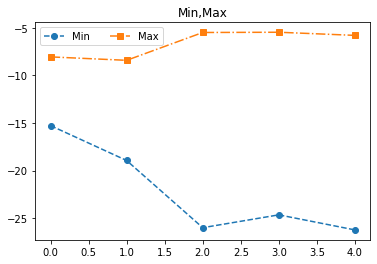

In [5]:
plt.plot(df['Min'],label = 'Min',marker = 'o', linestyle = '--')
plt.plot(df['Max'],label = 'Max',marker = 's', ls = '-.')
plt.legend(ncol = 2)
plt.title('Min,Max')
plt.show()

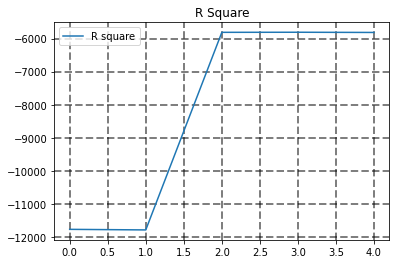

In [9]:
plt.plot(df['R Square'],label = 'R square')
plt.legend()
plt.title('R Square')
plt.grid(axis = 'x', color = 'black', alpha = 0.5, ls = '--', linewidth = 2) # x축 눈금 격자 만들기
plt.grid(axis = 'y', color = 'black', alpha = 0.5, ls = '--', linewidth = 2) # y축 눈금 격자 만들기
plt.show()

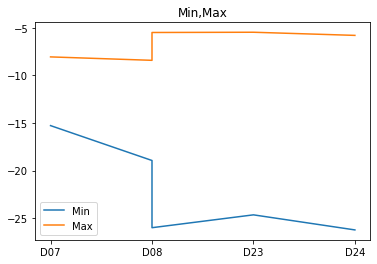

In [7]:
plt.plot(df['Wafer'], df['Min'],label = 'Min')
plt.plot(df['Wafer'], df['Max'],label = 'Max')
plt.title('Min,Max')
plt.legend()
plt.show()

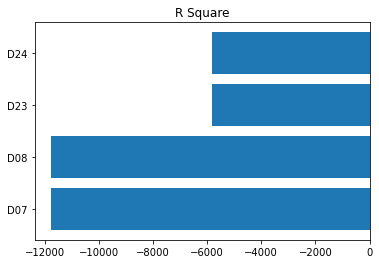

In [8]:
plt.barh(df['Wafer'],df['R Square'])
plt.title('R Square')
plt.show()

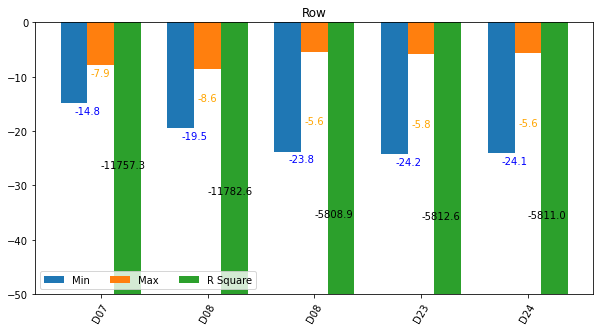

In [8]:
index = np.arange(df.shape[0])
plt.figure(figsize = (10,5))
plt.title('Row')
w = 0.25
bar1 = plt.bar(index - w, df['Min'], width = w, label = 'Min')
bar2 = plt.bar(index, df['Max'], width = w, label = 'Max')
bar3 = plt.bar(index + w, df['R Square'], width = w, label = 'R Square')
plt.ylim(-50, 0)
plt.legend(ncol = 3)
plt.xticks(index, df['Wafer'], rotation = 60)

for idx, rect in enumerate(bar1):
    plt.text(idx, rect.get_height() - 2, round(df['Min'][idx],1), ha = 'right', color = 'blue')
for idx, rect in enumerate(bar1):
    plt.text(idx, rect.get_height() + 5, round(df['Max'][idx],1), ha = 'center', color = 'orange')
for idx, rect in enumerate(bar1):
    plt.text(idx, rect.get_height() -12, round(df['R Square'][idx],1), ha = 'left', color = 'black')

plt.show()